# **Predicting Student Depression Through Academic and Lifestyle Factors**
****

Description :

This dataset captures various academic, lifestyle, and psychological factors affecting students' mental health. It includes features like academic pressure, sleep duration, CGPA, dietary habits, and financial stress. The target variable indicates whether a student is experiencing depression. The data aims to support analysis and prediction of depression risk among students. It can be used for mental health research or machine learning applications.










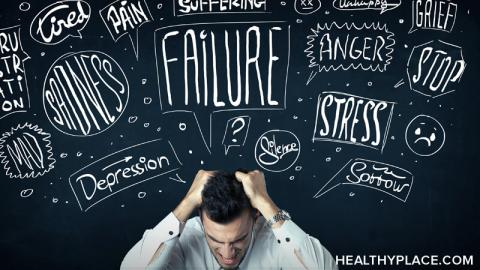

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

In [64]:
data=pd.read_csv("/content/student_depression_dataset.csv")

In [65]:
df=pd.DataFrame(data)

statistical measure :

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [67]:
df.shape

(27901, 18)

In [68]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [69]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


missing values


In [70]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


There are no empty or missing values in the dataset.

Handling Duplicate

In [73]:
df.duplicated().sum()

np.int64(0)

In [74]:
df.drop_duplicates()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


The dataset does not contain any duplicate records.

**One Hot Encoding** :


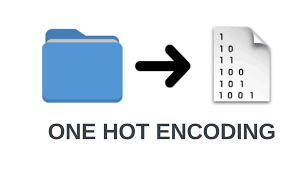

One-hot encoding is a method used to convert categorical data into
numerical form by creating separate binary columns for each category.
helps machine learning models understand categorical variables by representing each category as a unique combination of 0s and 1s.

In [75]:
le= le()

In [76]:
oh = OneHotEncoder(sparse_output=False)
diet_reshaped = df['Dietary Habits'].values.reshape(-1, 1)
encoded_diet = oh.fit_transform(diet_reshaped)
encoded_diet_df = pd.DataFrame(encoded_diet, columns=oh.categories_[0], dtype=int)
df = pd.concat([df, encoded_diet_df], axis=1)
df.drop(columns=['Dietary Habits'], inplace=True)
df.to_csv("encoded_student_depression_dataset.csv", index=False)
print(df.head())


   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  ...   Degree  \
0            0.0  8.97                 2.0               0.0  ...  B.Pharm   
1            0.0  5.90                 5.0               0.0  ...      BSc   
2            0.0  7.03                 5.0               0.0  ...       BA   
3            0.0  5.59                 2.0               0.0  ...      BCA   
4            0.0  8.13                 3.0               0.0  ...   M.Tech   

  Have you ever had suicidal thoughts ? Work/Study Hours  Financial Stress  \
0                                   Yes     

✍ This program changes the 'Dietary Habits' column into numeric form using one-hot encoding.  
It creates separate binary columns for each dietary category and adds them to the dataset.  
Finally, it removes the original column and saves the updated data to a new CSV file.






**outliers** :

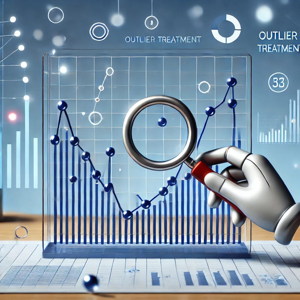

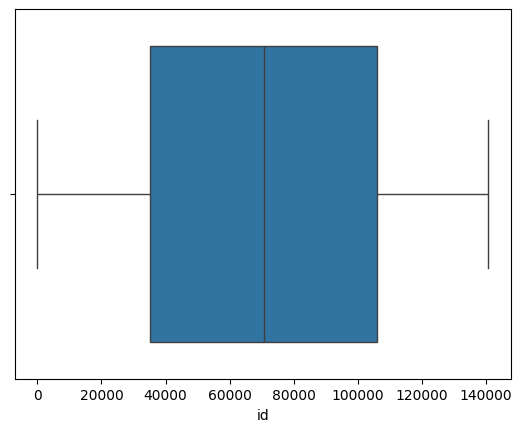

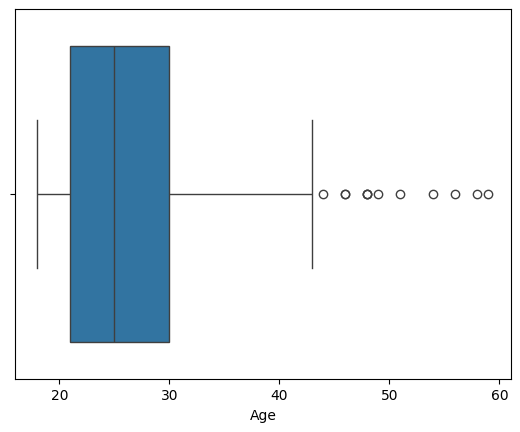

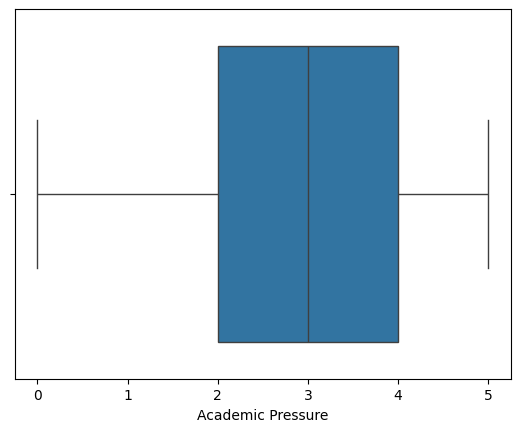

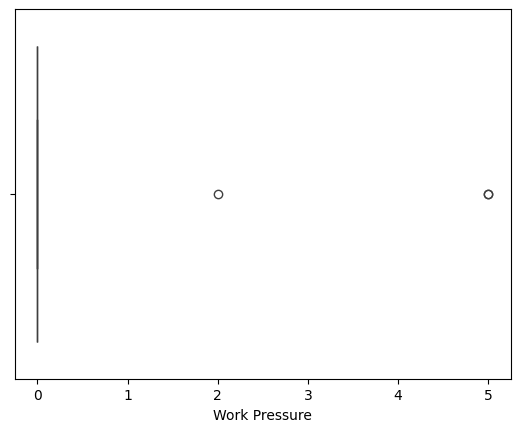

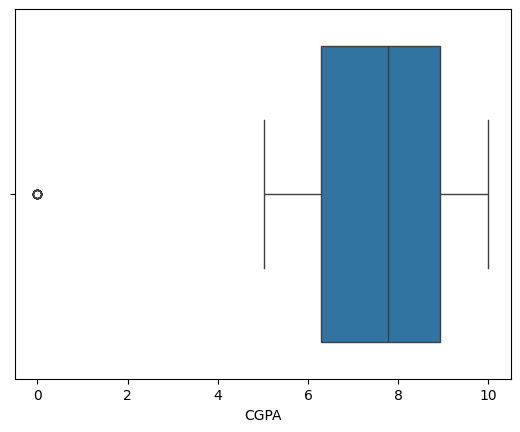

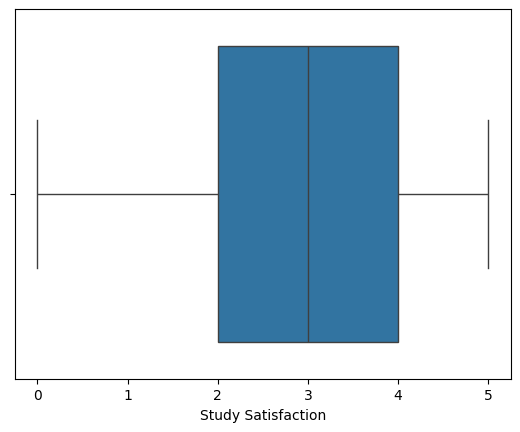

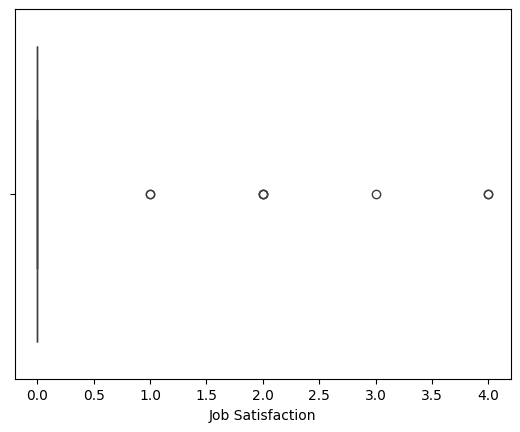

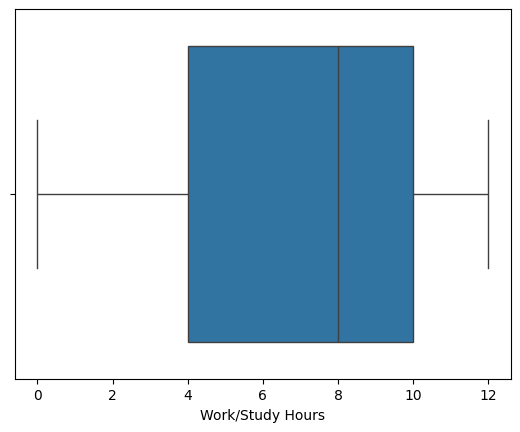

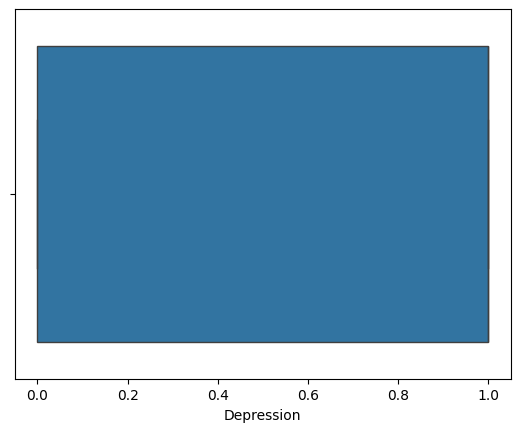

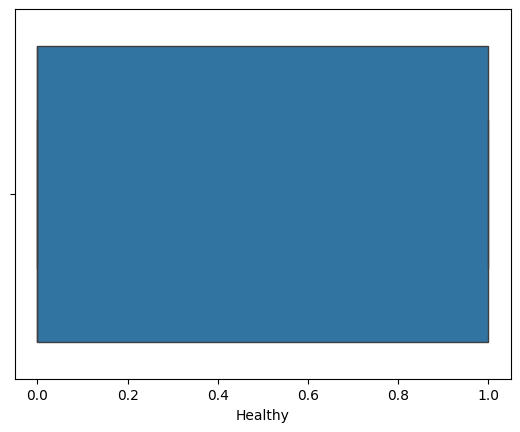

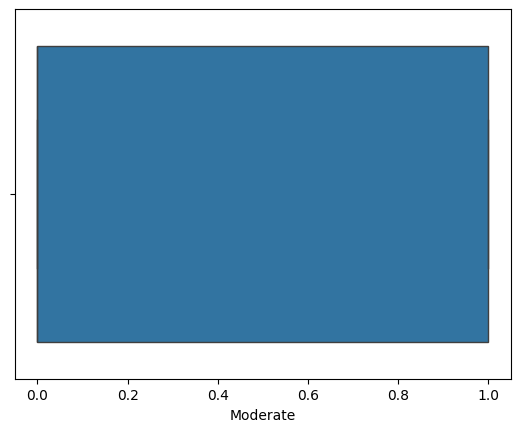

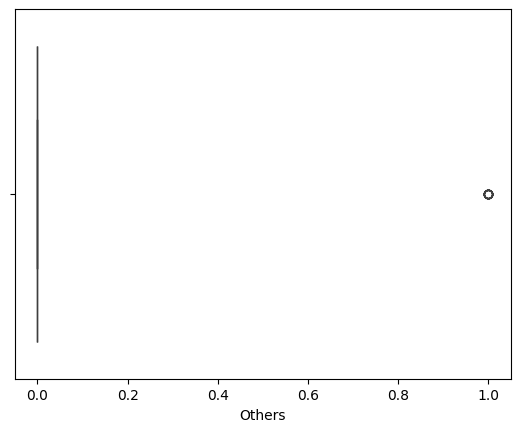

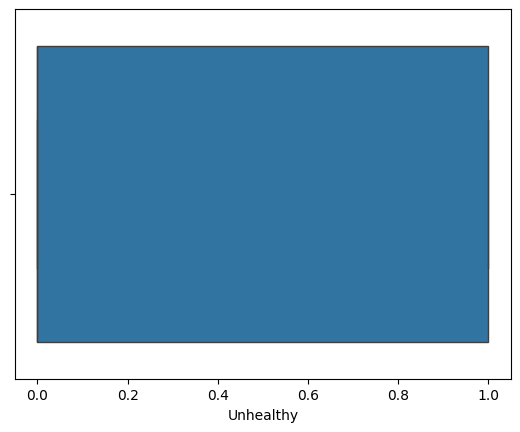

In [77]:
num_columns=df.select_dtypes(include='number')
num_columns.head()
for column in num_columns.columns:
  sns.boxplot(data=num_columns,x=column)
  plt.show()
def handling_outliers(df):
  for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[col]=df[col].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
  return df

<Axes: >

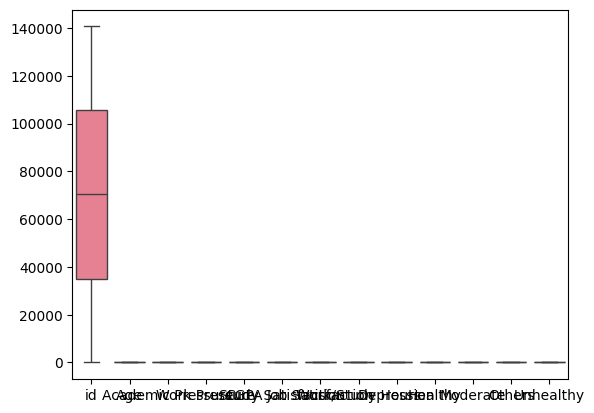

In [78]:
df=handling_outliers(df)
df.head()
sns.boxplot(df)

 The project identifies numerical columns, visualizes them with box plots to detect outliers, and uses the IQR method to cap extreme values by replacing them with boundary limits, reducing their impact on the dataset:



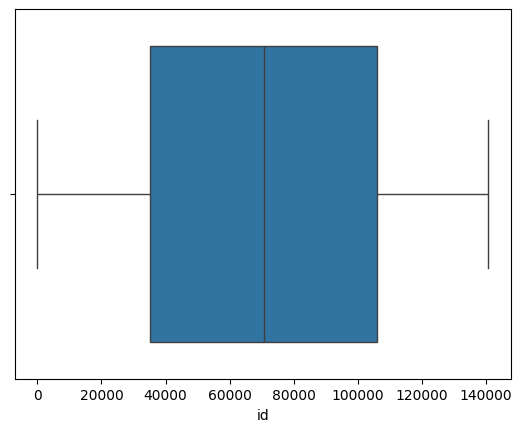

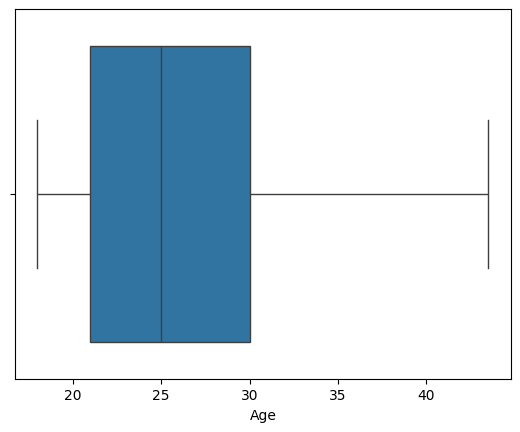

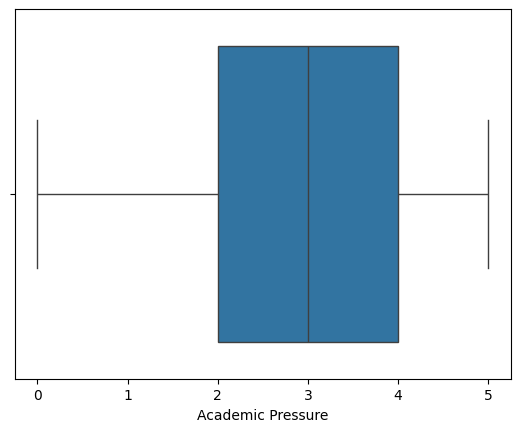

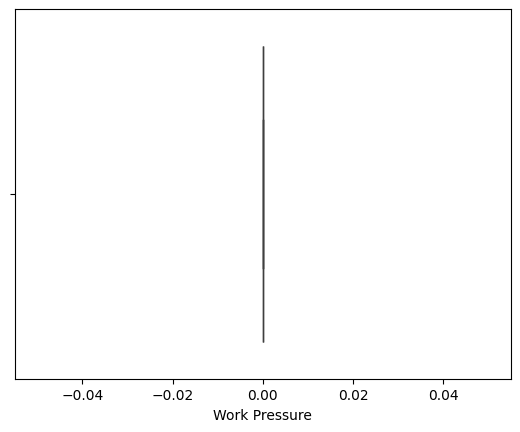

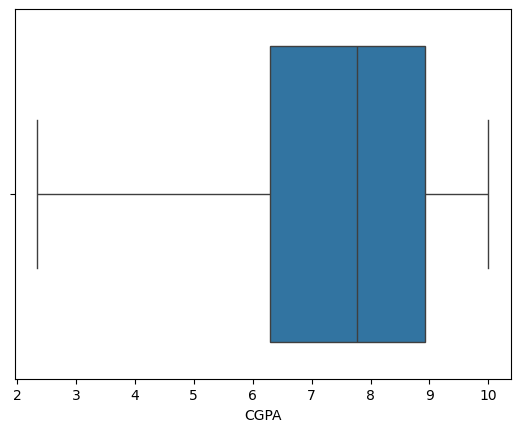

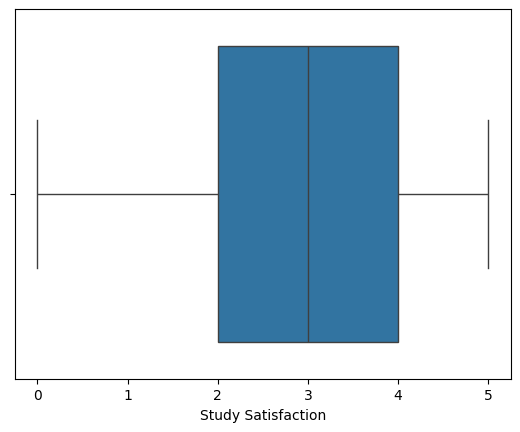

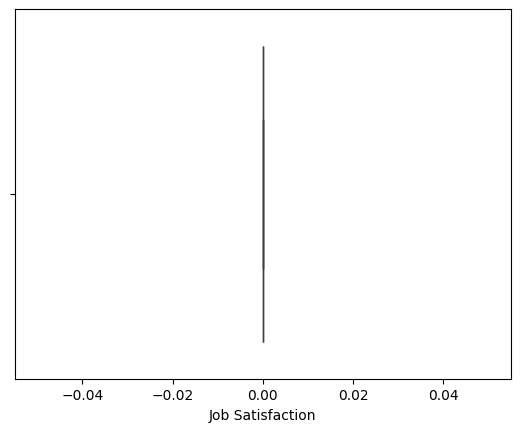

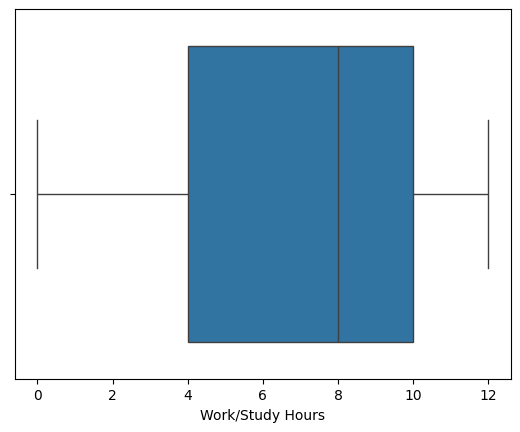

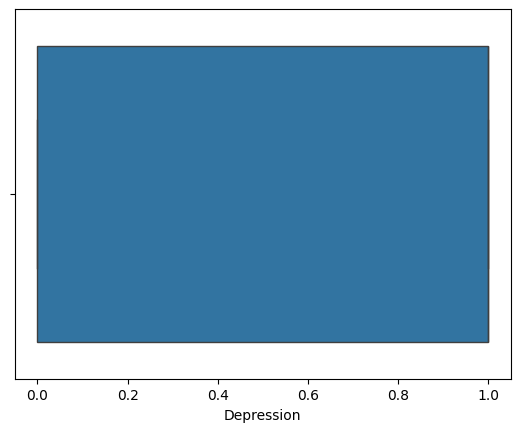

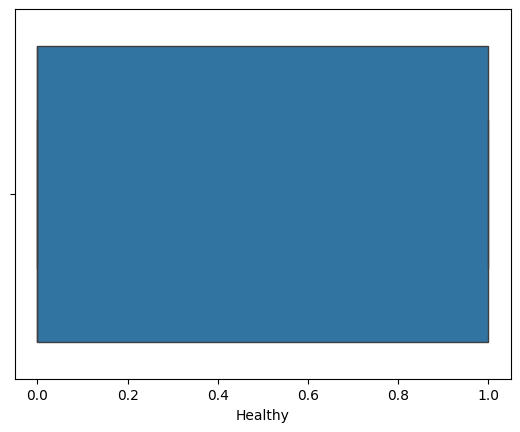

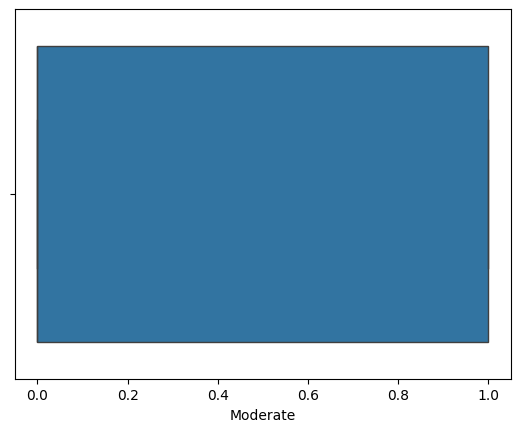

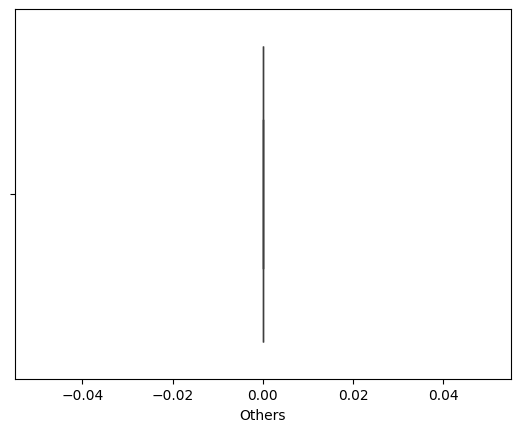

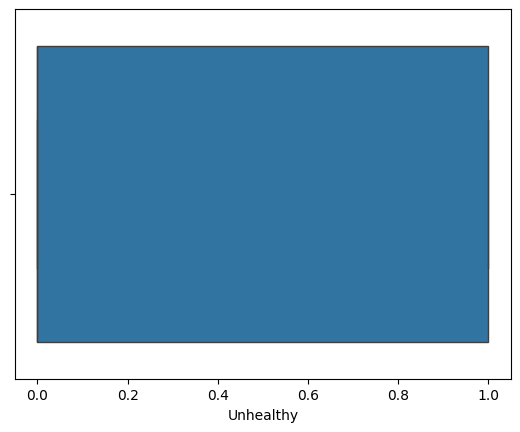

In [79]:
for column in num_columns.columns:
  sns.boxplot(data=df,x=column)
  plt.show()

visualization

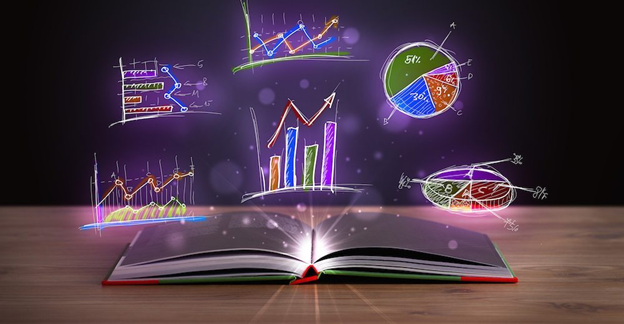

In [80]:
corr_matrix = df.corr(numeric_only=True)
fig = px.imshow(corr_matrix,x=corr_matrix.columns,y=corr_matrix.columns,color_continuous_scale='RdBu_r',zmin=-1,zmax=1,text_auto=True,title="Heatmap of Feature Correlations")
fig.update_layout(xaxis_title="",yaxis_title="")
fig.show()

This code calculates the correlation between all numerical features in the dataset.  
It then visualizes these correlations using a colorful heatmap where values range from -1 to 1.  
The heatmap helps to identify strong positive or negative relationships between features.

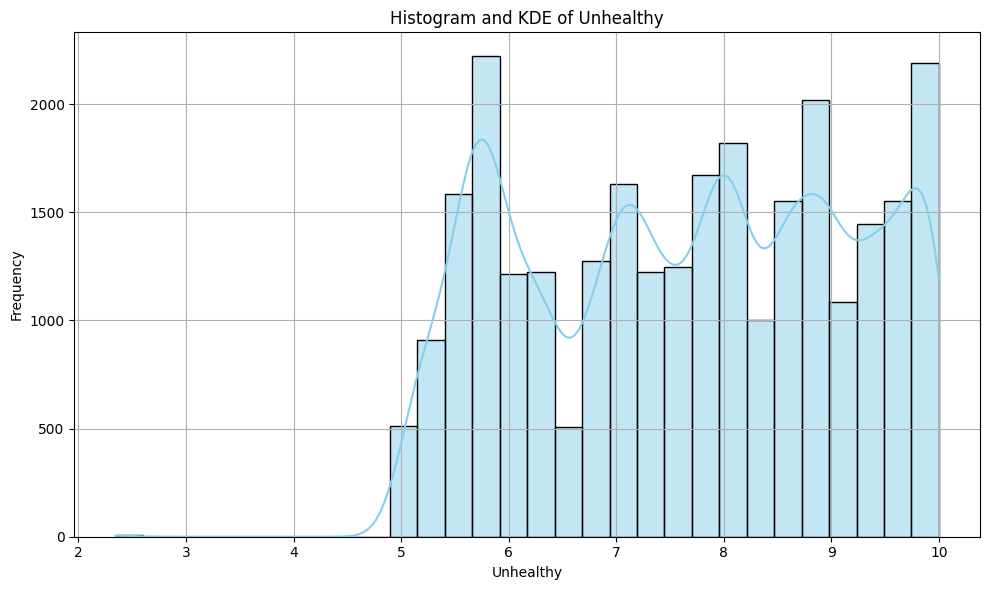

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CGPA'], kde=True, bins=30, color='skyblue')
plt.title(f'Histogram and KDE of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

This code creates a histogram with a KDE (Kernel Density Estimate) plot for the **CGPA** column.  
It helps visualize the distribution and shape of CGPA values in the dataset.  
The plot includes axis labels, a title, gridlines, and adjusts layout for better appearance.

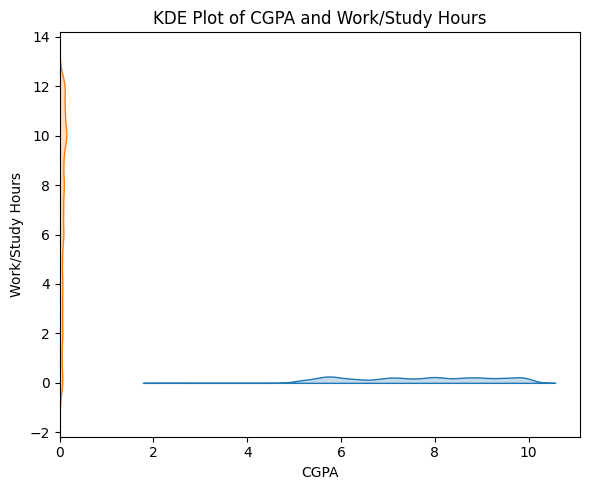

In [100]:
plt.figure(figsize=(6, 5))
sns.kdeplot(x=df['CGPA'],fill=True)
sns.kdeplot(y=df['Work/Study Hours'],fill=True)
plt.title('KDE Plot of CGPA and Work/Study Hours')
plt.xlabel('CGPA')
plt.ylabel('Work/Study Hours')
plt.tight_layout()
plt.show()

This code creates a KDE plot to show the distributions of CGPA (on the x-axis) and Work/Study Hours (on the y-axis).
It uses fill=True to shade the areas under each density curve for better visualization.
The plot helps compare how both variables are spread across their respective ranges

skewness

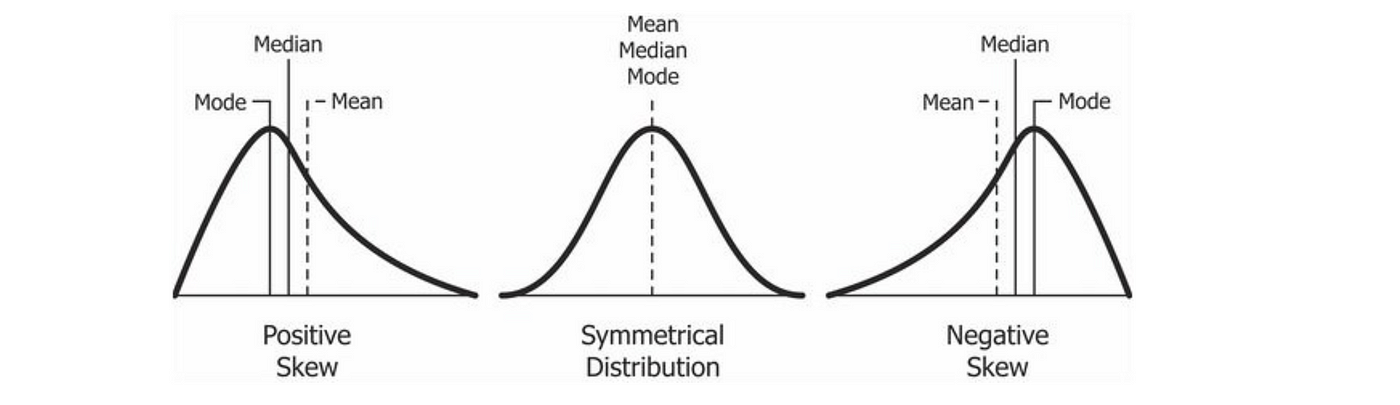

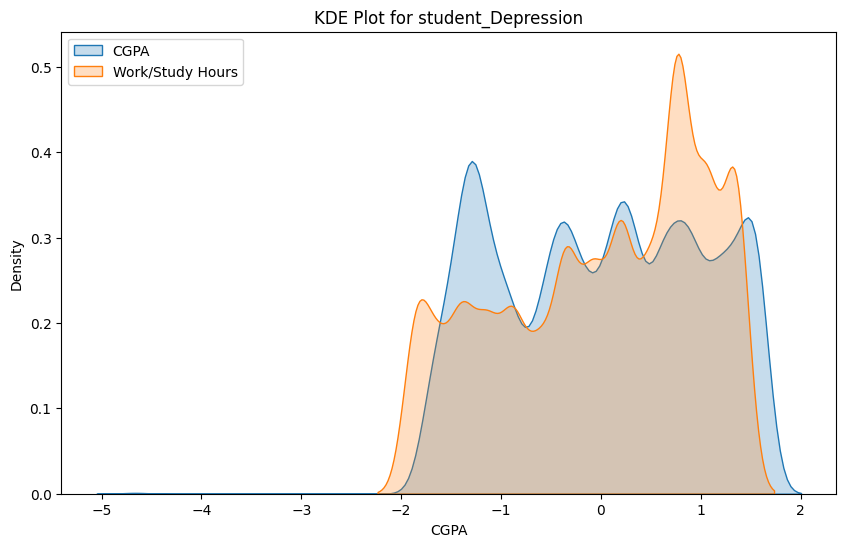

id Skewness: -0.0054
Age Skewness: 0.0933
Academic Pressure Skewness: -0.1352
Work Pressure Skewness: nan
CGPA Skewness: -0.0849
Study Satisfaction Skewness: 0.0104
Job Satisfaction Skewness: nan
Work/Study Hours Skewness: -0.4547
Depression Skewness: -0.3471
Healthy Skewness: 1.0122
Moderate Skewness: 0.6034
Others Skewness: nan
Unhealthy Skewness: 0.5395


In [83]:
cols_to_transform = ['CGPA','Work/Study Hours']
pt = PowerTransformer(method='yeo-johnson')
data[cols_to_transform] = pt.fit_transform(data[cols_to_transform])
plt.figure(figsize=(10, 6))
sns.kdeplot(data["CGPA"], label="CGPA", fill=True)
sns.kdeplot(data["Work/Study Hours"], label="Work/Study Hours", fill=True)
plt.legend()
plt.title("KDE Plot for student_Depression")
plt.show()
for col in df.select_dtypes(include=['number']).columns:
    print(f"{col} Skewness: {skew(df[col]):.4f}")


This code uses the Yeo-Johnson PowerTransformer to normalize the distributions of CGPA and Work/Study Hours.
It then plots their KDE curves to visualize the smoothed distributions after transformation.
Finally, it prints the skewness of all numerical columns to check for symmetry in the data.

In [84]:
skewness=df[['CGPA','Work/Study Hours']].skew()
print(skewness)

CGPA               -0.084858
Work/Study Hours   -0.454769
dtype: float64


feature selection

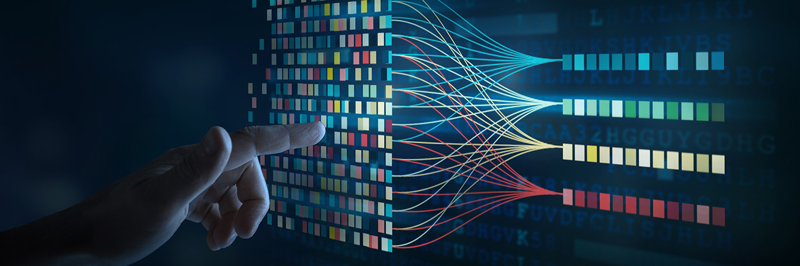

In [97]:
x = df.select_dtypes(include=['number']).drop(columns='Depression', axis=1)
y = df['Depression']
selecter = SelectKBest(score_func=f_classif, k=12)
x_new = selecter.fit_transform(x, y)
selected_features_num = x.columns[selecter.get_support()]
features_score = pd.DataFrame({'Features': selected_features_num, 'Scores': selecter.scores_[selecter.get_support()]})
features_score = features_score.sort_values(by='Scores', ascending=False)
print(features_score)

              Features       Scores
2    Academic Pressure  8121.471807
1                  Age  1507.885579
7     Work/Study Hours  1268.752140
11           Unhealthy  1037.493747
5   Study Satisfaction   810.006999
8              Healthy   772.709388
9             Moderate    40.573772
4                 CGPA    13.649360
0                   id     0.023775
3        Work Pressure          NaN
6     Job Satisfaction          NaN
10              Others          NaN


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning:

Features [ 3  6 10] are constant.

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning:

invalid value encountered in divide



This code selects the top 12 most relevant numerical features for predicting depression using the ANOVA F-test (f_classif).
It transforms the feature set accordingly and stores the selected features along with their scores in a DataFrame.

train and test split

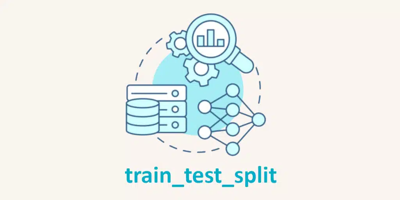

In [86]:
x_selected=x[selected_features_num]
x_selected.columns
x_train,x_test,y_train,y_test=train_test_split(x_selected,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22320, 12)
(5581, 12)
(22320,)
(5581,)


This code selects the best features and splits the data into training and testing sets with 80% for training and 20% for testing.  
It then prints the shape of each split to show the number of samples and features.

scaling

In [101]:
x_test_scaled=Ss.fit_transform(x_test)
x_train_scaled=Ss.fit_transform(x_train)
Ss=StandardScaler()
x_test_scaled=Ss.fit_transform(x_test)
x_train_scaled=Ss.fit_transform(x_train)

This code uses **StandardScaler** to scale the training and testing data so that features have a mean of 0 and standard deviation of 1.  
Scaling helps improve the performance of many machine learning models by standardizing feature ranges.

model building

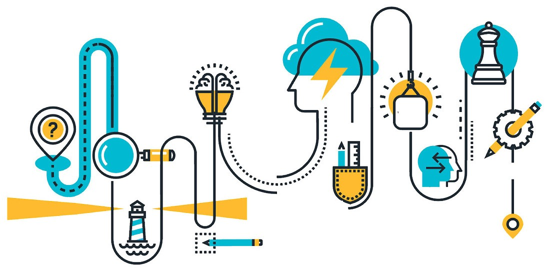

In [89]:
classifiers={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'SVC':SVC(),
    'Random Forest Classifier':RandomForestClassifier()
}
for name,clf in classifiers.items():
  clf.fit(x_train_scaled,y_train)
  y_pred=clf.predict(x_test_scaled)
  print(f"\n {name} results:")
  print("accuracy:",accuracy_score(y_test,y_pred))
  print("confusion matrix:\n")
  print(confusion_matrix(y_test,y_pred))
  print("classification report:\n")
  print(classification_report(y_test,y_pred))


 Logistic Regression results:
accuracy: 0.7708296004300305
confusion matrix:

[[1605  738]
 [ 541 2697]]
classification report:

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      2343
           1       0.79      0.83      0.81      3238

    accuracy                           0.77      5581
   macro avg       0.77      0.76      0.76      5581
weighted avg       0.77      0.77      0.77      5581


 Decision Tree Classifier results:
accuracy: 0.6697724422146569
confusion matrix:

[[1422  921]
 [ 922 2316]]
classification report:

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      2343
           1       0.72      0.72      0.72      3238

    accuracy                           0.67      5581
   macro avg       0.66      0.66      0.66      5581
weighted avg       0.67      0.67      0.67      5581


 SVC results:
accuracy: 0.7659917577495072
confusion matrix:

[[1499  844]
 [ 46

In [90]:
print("The Best Model is : Logistic Regression ")

The Best Model is : Logistic Regression 


This code trains and evaluates four different classification models on the scaled data, including accuracy, confusion matrix, and classification report.  It helps compare model performance to choose the best one for predicting depression.